# Análise

**Instalando o Cassandra no Jupyter**

`docker-compose exec jupyter pip install cassandra-driver`

## Configurações Iniciais

### Imports

In [1]:
from scripts.analise_np import AnaliseNP
from scripts.cassandra_db import CassandraDB
from scripts.grafico_np import GraficoNP
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
db = CassandraDB()
db.hosts = ['cassandra']
db.username = 'cassandra'
db.password = 'cassandra'
db.keyspace = 'alunos'
db.connect()
anp = None

### Filtro

In [3]:
filtros ={
    'tabelas':{
        'curso':{
            'rotulo':'Tipo de Curso',
            'tabela':'fato_aluno_curso',
            'campo':'tipo_curso',
            'ordenar':[],
        },
        'cor':{
            'rotulo':'Cor/Raça',
            'tabela':'fato_aluno_cor',
            'campo':'cor_raca',
            'ordenar':[],
        },
        'etaria':{
            'rotulo':'Faixa Etária',
            'tabela':'fato_aluno_etaria',
            'campo':'faixa_etaria',
            'ordenar':[
                    'Menor de 14 anos',
                    '15 a 19 anos',
                    '20 a 24 anos',
                    '25 a 29 anos',
                    '30 a 34 anos',
                    '35 a 39 anos',
                    '40 a 44 anos',
                    '45 a 49 anos',
                    '50 a 54 anos',
                    '55 a 59 anos',
                    'Maior de 60 anos',
            ],
        },
        'renda':{
            'rotulo':'Renda Familiar',
            'tabela':'fato_aluno_renda',
            'campo':'renda_familiar',
            'ordenar':[
                    '0<RFP<=0,5',
                    '0,5<RFP<=1,0',
                    '1,0<RFP<=1,5',
                    '1,5<RFP<=2,5',
                    '2,5<RFP<=3,5',
                    'RFP>3,5',
                    'NÃO DECLARADA',
            ],
        },
        'sexo':{
            'rotulo':'Sexo',
            'tabela':'fato_aluno_sexo',
            'campo':'sexo',
            'ordenar':[],
        },
    },
    'cursos':{
        'todos':[],
        'infantil':['Educação Infantil'],
        'fundamental': ['Ensino Fundamental I','Ensino Fundamental II'],
        'medio' :['Ensino Médio'],
        'tecnico':['Técnico'],
        'fic' :['Qualificação Profissional (FIC)'],
        'superior':['Bacharelado','Licenciatura','Tecnologia'],
        'especializacao':['Especialização (Lato Sensu)'],
        'mestrado':['Mestrado','Mestrado Profissional'],
        'doutorado':['Doutorado','Doutorado Profissional'],
        'pos' :['Especialização (Lato Sensu)','Mestrado','Mestrado Profissional','Doutorado','Doutorado Profissional'],
        'tecnico_e_superior':['Técnico','Bacharelado','Licenciatura','Tecnologia' ],
    },
    'instituicoes':{
        'brasil':'',
        'ifpb':'IFPB',
    }
}

### Função

In [4]:
def consulta(
        tabela, 
        curso='todos', 
        instituicao='brasil', 
        categorias = ['Evadidos','Concluintes','Em curso'], 
        tamFigura=(12,8)):
    global anp
    tabelas = filtros['tabelas']
    cursos = filtros['cursos'][curso]
    rotulo = tabelas[tabela]['rotulo']
    instituicoes = filtros['instituicoes'][instituicao]        
    anp = AnaliseNP(
        db = db,
        tabela = tabelas[tabela]['tabela'],
        campo = tabelas[tabela]['campo'],
        ordenar = tabelas[tabela]['ordenar'],
        tiposCurso = cursos,
        categorias = categorias)
    anp.rotuloCampo = rotulo
    anp.instituicao = instituicoes
    anp.executarConsulta() 
    print("-"*150)
    print("{} {} | {} | {}".format(" "*10, instituicao.upper(), curso.upper(), tabelas[tabela]['rotulo'].upper()))
    print("-"*150)
    print(anp.dadosSumario)
    print("-"*150 + "\n")
    print("Total de registros: {:,}".format(anp.total).replace(',','.'))
    gnp = GraficoNP(anp)
    gnp.tamFonte = 16
    gnp.tamFigura = tamFigura
    gnp.mostrarGraficos()
    plt.subplots_adjust(bottom=0.0, top=6,hspace=1, wspace=0.3)    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Consultar

SELECT categoria_situacao, sexo, tipo_curso, sum(quant_grupo) AS quant_grupo FROM fato_aluno_sexo  WHERE (categoria_situacao IN ('Evadidos','Concluintes'))  GROUP BY categoria_situacao, sexo, tipo_curso ALLOW FILTERING;
------------------------------------------------------------------------------------------------------------------------------------------------------
           BRASIL | TECNICO | SEXO
------------------------------------------------------------------------------------------------------------------------------------------------------
           Concluintes  Evadidos   total  Concluintes_%  Evadidos_%  \
Masculino        83131     82155  165286      50.295246   49.704754   
Feminino         75845     66247  142092      53.377389   46.622611   
TOTAL           158976    148402  307378      51.720032   48.279968   

              total_%  
Masculino   53.772879  
Feminino    46.227121  
TOTAL      100.000000  
--------------------------------------------------------------

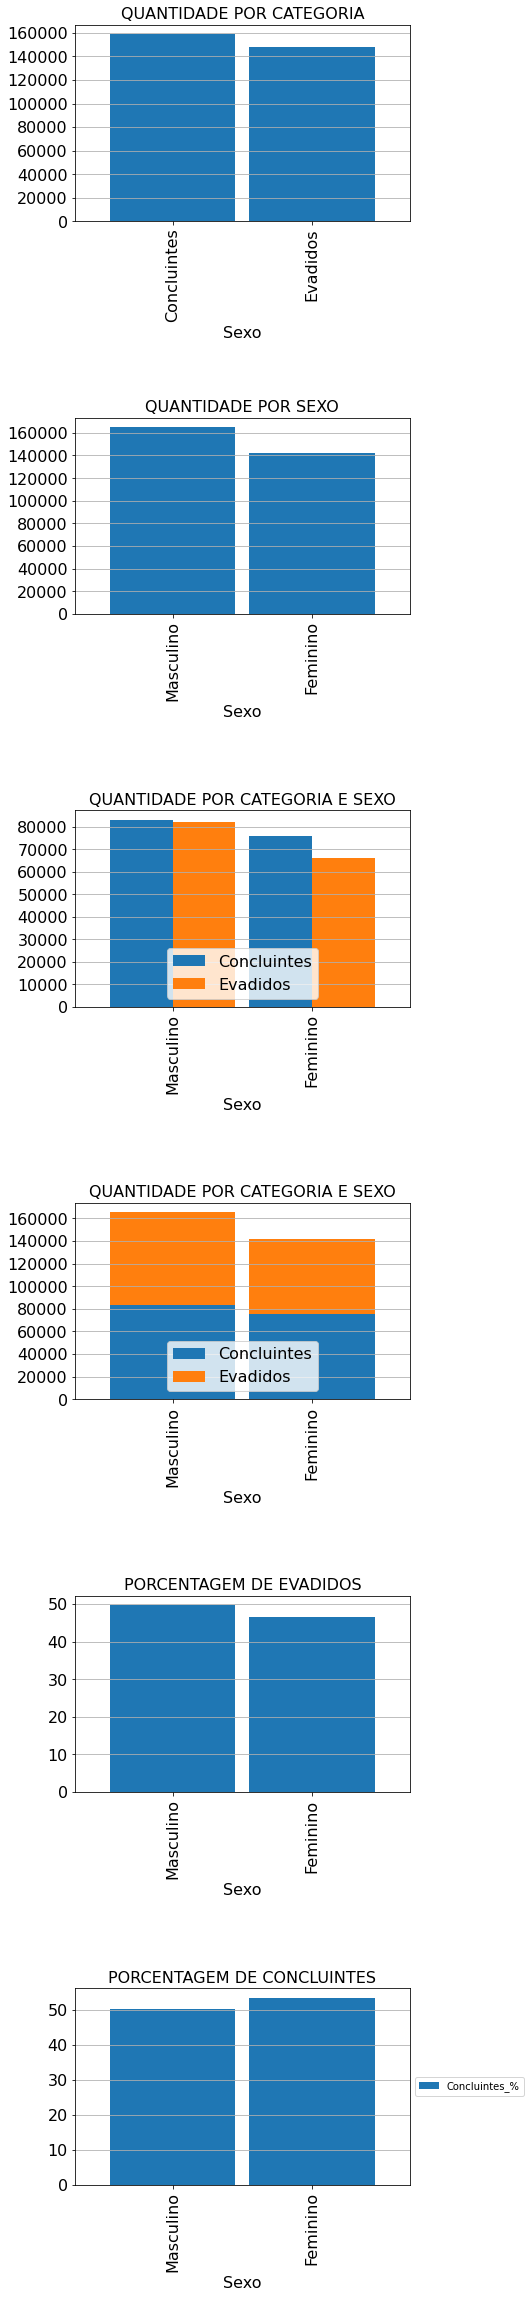

In [9]:


# curso, cor, etaria, renda, sexo
tabela = 'sexo'

# todos, superior, tecnico, tecnico_e_superior
curso = 'tecnico'

# brasil, ifpb
instituicao = 'brasil'

# Evadidos,Concluintes,Em curso
categorias=['Evadidos','Concluintes']

#--------------------------------------------------------
tamFigura = (6,5)
consulta(
    tabela=tabela, 
    curso=curso, 
    instituicao=instituicao, 
    categorias=categorias, 
    tamFigura=tamFigura)

## RESUMO

In [6]:
print("-"*150)
print("{} {} | {} | {}".format(" "*10, instituicao.upper(), curso.upper(), tabela.upper()))
print("-"*150)
print("Total de registros: {:,}".format(anp.total).replace(',','.'))
print("-"*150)
anp.dadosSumario

------------------------------------------------------------------------------------------------------------------------------------------------------
           BRASIL | TECNICO | SEXO
------------------------------------------------------------------------------------------------------------------------------------------------------
Total de registros: 307.378
------------------------------------------------------------------------------------------------------------------------------------------------------


,Concluintes,Evadidos,total,Concluintes_%,Evadidos_%,total_%
Masculino,83131,82155,165286,50.295246,49.704754,53.772879
Feminino,75845,66247,142092,53.377389,46.622611,46.227121
TOTAL,158976,148402,307378,51.720032,48.279968,100.000000


In [7]:
anp.dadosQuant

,quant_grupo
categoria_situacao,
Concluintes,158976
Evadidos,148402
